In [7]:
from sklearn import datasets
digits = datasets.load_digits()

In [9]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [10]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [11]:
digits.data.shape

(1797, 64)

In [17]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

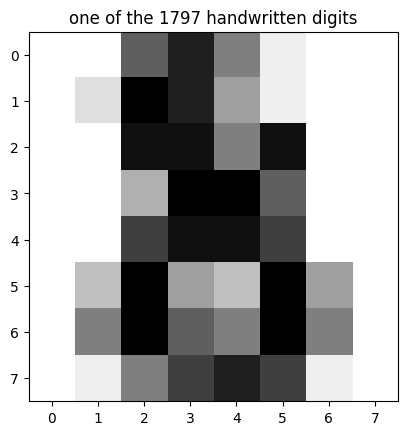

In [21]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[1796], cmap=plt.cm.gray_r, interpolation='nearest')
plt.title('one of the 1797 handwritten digits')
plt.savefig('plot1.png', dpi=100, bbox_inches='tight')

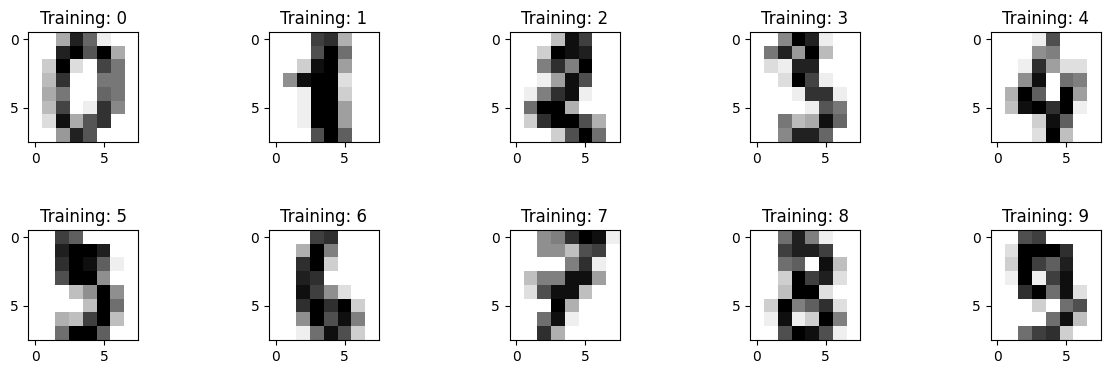

In [22]:
import numpy as np
plt.figure(figsize=(15,4))
plt.subplots_adjust(hspace=0.8)
images_and_labels = list(zip(digits.images, digits.target))

for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label, fontsize =12)
plt.savefig('plot2.png', dpi=300, bbox_inches='tight')

In [23]:
n = len(digits.images)
print(n)
data = digits.images.reshape((n, -1))

1797


In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.01, random_state=0)

In [25]:
from sklearn import svm
svc = svm.SVC(gamma=0.001, C=100.)

In [26]:
svc.fit(x_train, y_train)

SVC(C=100.0, gamma=0.001)

In [27]:
y_pred =svc.predict(x_test)
y_pred

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0])

In [32]:
import joblib
joblib.dump(svc, 'model.pkl')

['model.pkl']

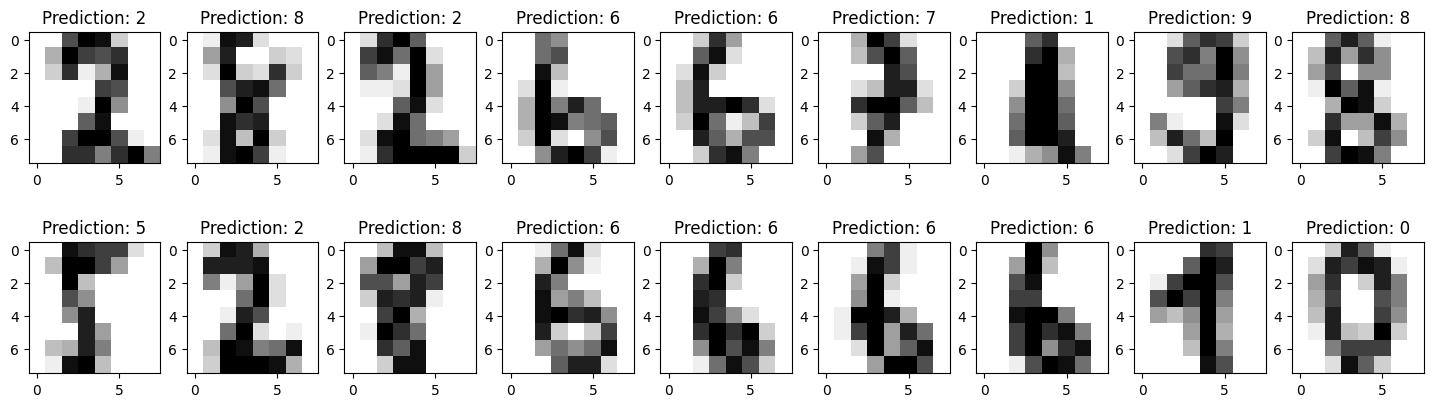

In [28]:
images_and_predictions = list(zip(x_test,y_pred))

plt.figure(figsize=(18,5))
for index, (image, prediction) in enumerate(images_and_predictions[:19]):
    plt.subplot(2, 9, index + 1)
    image = image.reshape(8, 8)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.savefig('plot3.png', dpi=300, bbox_inches='tight')

In [29]:
score = svc.score(x_test, y_test)
print('Accuracy Score: {0}'.format(score))

Accuracy Score: 1.0


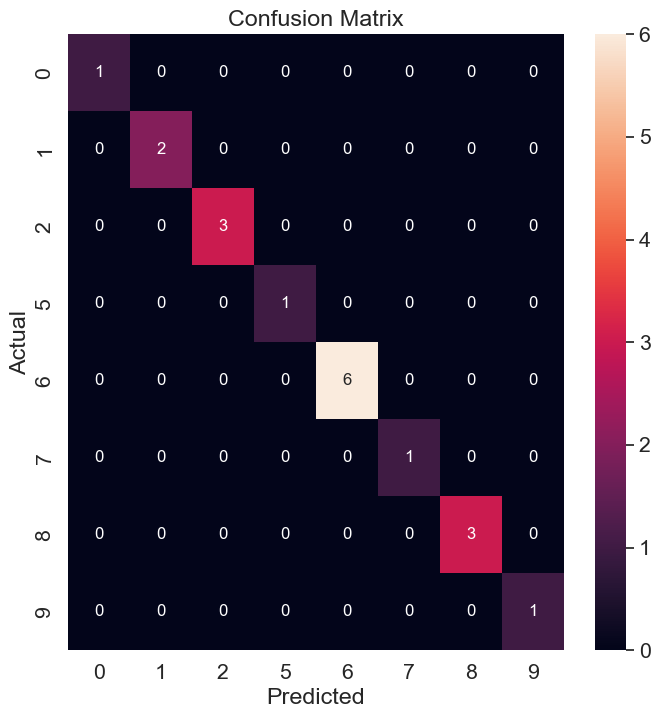

In [33]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

data = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (8,8))
sn.set(font_scale=1.4)#for label size
plt.title('Confusion Matrix')
sn.heatmap(df_cm, annot=True,annot_kws={"size": 12})# font size
plt.savefig('plot4.png', dpi=100, bbox_inches='tight')

In [31]:
from sklearn.metrics import classification_report
cr=classification_report(y_test, y_pred)
print("Classification Report:\n\n", cr)

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         3
           9       1.00      1.00      1.00         1

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18

